## Is `np.nansum` faster than the usual `np.sum`?

Is `np.nansum` able to go faster somehow in presence of `np.nan`?

In [1]:
import numpy as np
from plot_machinery.plot import data, kernel, plot, repeat_count

In [2]:
@kernel()
def standard_sum(x, _):
    return np.sum(x)


@kernel()
def nansum(_, x):
    return np.nansum(x)


@data(
    steps=[
        100,
        500,
        1000,
        5000,
        10000,
        50000,
        100000,
        500000,
        1000000,
        5000000,
        10000000,
    ]
)
def data_gen(step):
    x = np.zeros((step, 100))
    x[step // 5 : 2 * (step // 5)] = 4
    x[3 * step // 4 :] = 12

    y = np.full((10000, 1000), np.nan)
    y[step // 5 : 2 * (step // 5)] = 4
    y[3 * step // 4 :] = 12

    return x, y


@repeat_count
def repcnt(step):
    return 10

Doing step 100 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 500 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 1000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 5000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 10000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 50000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 100000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 500000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 1000000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 5000000 with 1 repetitions
Doing kernel 0
Doing kernel 1
Doing step 10000000 with 1 repetitions
Doing kernel 0
Doing kernel 1


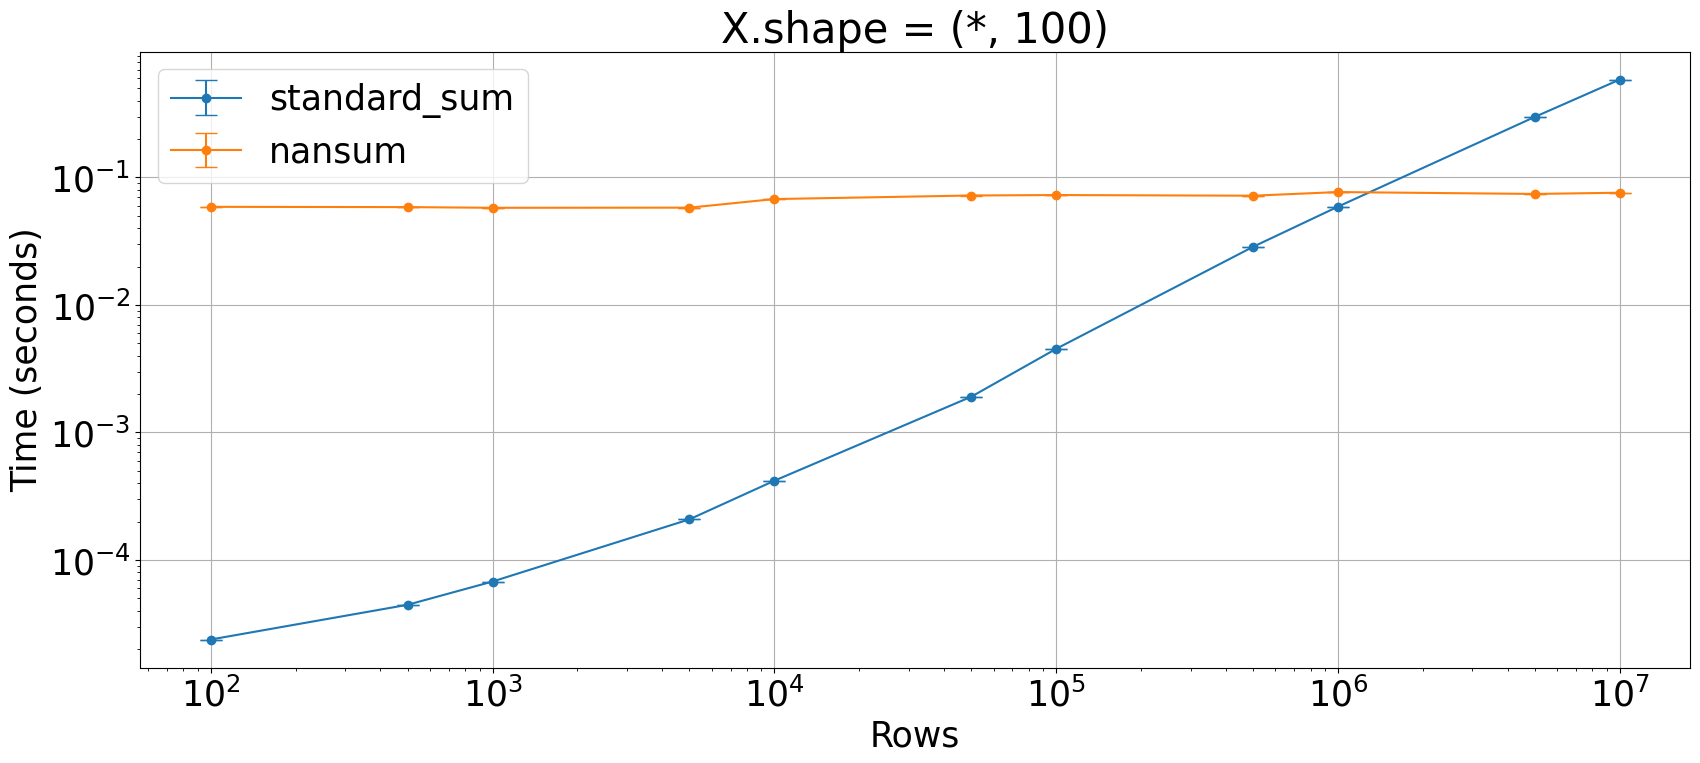

In [3]:
plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100)", verbose=True)